### Prosper

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

c:\Users\serhan.aydin\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
folders = ['Bondora','Home credit','Prosper','Zopa']
# data_names = ['bondora','hcredit','prosper','zopa']
files = ['Bondora_LoanData','application_train','prosperLoanData','zopa_data_for_loanbook_extract_2020-04-01']
target_cols = {'Prosper':'LoanStatus'}
cols_to_pct = {'Prosper':['MonthlyLoanPayment','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees',
                             'LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments']}
scaler_cols = {'Prosper':'LoanOriginalAmount'}

In [77]:
i=2
folders[i]
data = pd.read_csv('data/'+folders[i]+'/'+files[i]+'.csv', low_memory=False)
print(data.shape)
cols_to_drop = {'Prosper':['ListingKey', 'ListingNumber','LoanKey','LoanNumber','MemberKey','GroupKey']+[target_cols[folders[i]]]}
# add pct columns
for col in cols_to_pct[folders[i]]:
    data[col+' (%)'] = data[col] / data[scaler_cols[folders[i]]]

# add target col
data['Target'] = pd.Categorical(data[target_cols[folders[i]]]).codes.astype('int64')
data = data[(data['Target']==1) | (data['Target']==2) | (data['Target']==4)].reset_index(drop=True)
print(data.shape)

(113937, 81)
(55084, 91)


In [4]:
list(np.unique(data.LoanStatus))

['Chargedoff', 'Completed', 'Defaulted']

In [78]:
#checking the existing var types
# list(np.unique(data.dtypes))
data.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
                                        ...   
LP_CollectionFees (%)                  float64
LP_GrossPrincipalLoss (%)              float64
LP_NetPrincipalLoss (%)                float64
LP_NonPrincipalRecoverypayments (%)    float64
Target                                   int64
Length: 91, dtype: object

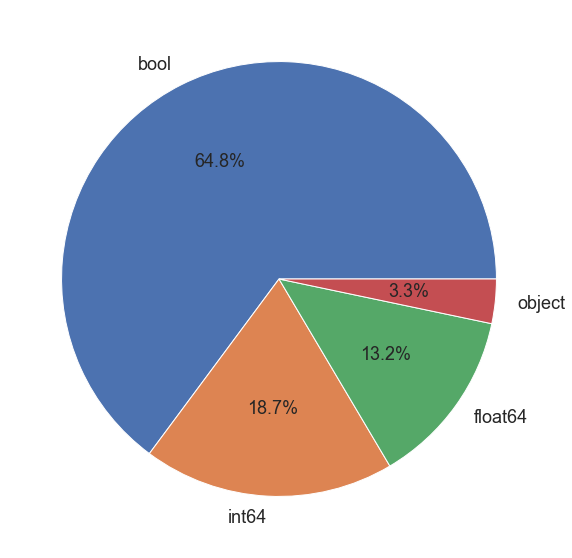

In [96]:
# data.dtypes.value_counts().plot(kind="pie")
# plt.pie(data.dtypes.value_counts())
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 18})
ax.pie(data.dtypes.value_counts(), labels=np.unique(data.dtypes), autopct='%1.1f%%', textprops={'fontsize': 18});

In [6]:
#checking the vars with a specific data type
data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',

In [7]:
data2 = data
data2 = data2.drop(columns=list(set(cols_to_drop[folders[i]]) | set(data.count().index[data.count()<0.5*len(data)])))
data2 = data2.dropna().reset_index(drop=True)
print(data2.shape)

(18506, 69)


In [8]:
for col in data2.columns[(data2.dtypes == 'bool')]:
    data2[col] = pd.Categorical(data2[col]).codes.astype('int64')

data2['LoanOriginationQuarter'] = [eval(data2['LoanOriginationQuarter'][_][1]) for _ in range(len(data2['LoanOriginationQuarter']))]
for col in data2.columns[(data2.dtypes == 'O')]:
    if ('Date' in col) or col=='FirstRecordedCreditLine':
        data2[col] = pd.to_datetime(data2[col]).dt.strftime('%Y').astype('int64')
    else:
        data2[col] = pd.Categorical(data2[col]).codes.astype('int64')

data2 = data2.drop(columns=[col for col in data2.columns if len(np.unique(data2[col]))==1])

print(data2.shape)

(18506, 67)


In [9]:
data2.columns

Index(['ListingCreationDate', 'CreditGrade', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanCurrentDaysD

(18506, 67)


Text(0.5, 1.0, 'Prosper (correlation matrix)')

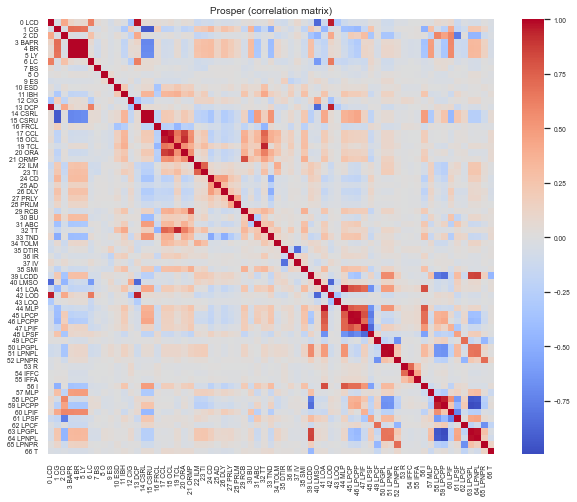

In [38]:
data2_std = (data2 - np.mean(data2,axis=0)) / np.std(data2,axis=0)
# data3 = pd.DataFrame(np.corrcoef(data2_std.T), index=data2.columns, columns=data2.columns)
# fig, ax = plt.subplots(figsize=(10,8))
# sns.heatmap(data3,cmap='vlag');#,annot=np.corrcoef(data2_std.T))

print(data2_std.shape)

new_labels = []
for j,s in enumerate(data2_std.columns):
    new_labels.append(str(j)+' '+''.join([c for c in s if c.isupper()]))

fig, ax = plt.subplots(figsize=(10,8)); sns.set_theme(font_scale=.6)
sns.heatmap(data2_std.corr(), cmap='coolwarm', annot_kws={"size": 10}, xticklabels=new_labels, yticklabels=new_labels)#, linewidths=.05, linecolor='gray');
plt.title(folders[i]+' (correlation matrix)', fontsize=10)
# np.corrcoef(data2_std.T)

In [39]:
# data2_std['Target'] = data['Target']

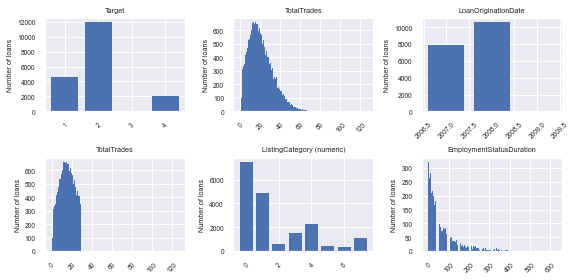

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(8,4))
# fig,axs = plt.subplots(3,3,figsize=(8,6))
plt.rcParams.update({'font.size': 10})
vars = ['Target', 'TotalTrades', 'LoanOriginationDate', 'TotalTrades', 'ListingCategory (numeric)','EmploymentStatusDuration']
for v,var in enumerate(vars):
    # if var == 'LoanOriginationDate':
    #     labels, counts = np.unique(np.array([eval(data2[var][i][:4]) for i in range(len(data2[var]))]), return_counts=True)
    # else:
    labels, counts = np.unique(data2[var], return_counts=True)
    plt.subplot(2,3,v+1)
    plt.bar(labels, counts, align='center',linewidth=0)#,color='blue')
    plt.title(var)
    # plt.xlabel('Year')
    # plt.xticks(np.unique([eval(data.LoanOriginationDate[i][:4]) for i in range(len(data.LoanOriginationDate))]))
    plt.ylabel('Number of loans')
    plt.xticks(rotation=45) #ticks=labels,
plt.tight_layout()
plt.show()
plt.savefig('intro.png')

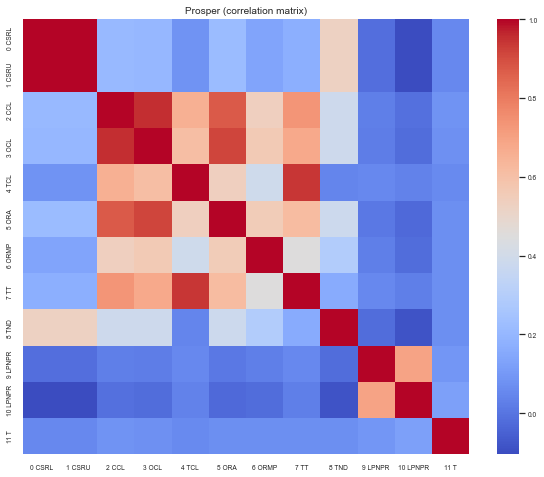

In [13]:
# data2_std.corr() = data2_std.corr()[(data2_std.corr()['Target']>=0.05) & (data2_std.corr().loc['Target',:]>=0.05)]
data2_std = data2_std.drop(columns=data2_std.corr()[data2_std.corr()['Target']<0.05].index)

new_labels = []
for j,s in enumerate(data2_std.columns):
    new_labels.append(str(j)+' '+''.join([c for c in s if c.isupper()]))

fig, ax = plt.subplots(figsize=(10,8)); sns.set_theme(font_scale=.6)
sns.heatmap(data2_std.corr(), cmap='coolwarm', annot_kws={"size": 10}, xticklabels=new_labels, yticklabels=new_labels)#, linewidths=.05, linecolor='gray');
plt.title(folders[i]+' (correlation matrix)', fontsize=10)

data2_std['Target'] = data['Target']

In [30]:
# %pip install imbalanced-learn
# from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, Y_resampled = ros.fit_resample(X, Y)
from collections import Counter
print(sorted(Counter(Y_resampled).items()))

[(1, 3486), (2, 3486), (4, 3486)]


In [32]:
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

classifiers = {'logistic': LogisticRegression(), 'svc_poly': SVC(kernel = 'poly'), 'svc_rbf': SVC(kernel = 'rbf'), 'svc_lin': SVC(kernel = 'linear'), 'lin_svc': LinearSVC(), \
    'dec tree': DecisionTreeClassifier(), 'sto_grad': SGDClassifier(), 'knn': KNeighborsClassifier(), 'grad boost': HistGradientBoostingClassifier(), 'mlp': MLPClassifier()}

# data3 = data2_std.sample(5000, replace=False)
data3 = data2_std
X = data3.iloc[:, :-1].values
Y = data3.iloc[:, -1].values

# X_resampled, Y_resampled = ros.fit_resample(X, Y)

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20)#, random_state = 0)
# plt.scatter(X_Train[:,1],Y_Train)

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_Train = sc_X.fit_transform(X_Train)
# X_Test = sc_X.transform(X_Test)

# Fitting the classifier into the Training set

scores = pd.DataFrame(columns=['tr_acc','tr_prec','tr_rec', 'tr_f1','te_acc','te_prec','te_rec', 'te_f1'])

tr_acc = {cname:[] for cname in classifiers.keys()}
tr_rec = {cname:[] for cname in classifiers.keys()}
tr_prec = {cname:[] for cname in classifiers.keys()}
tr_f1 = {cname:[] for cname in classifiers.keys()}
te_acc = {cname:[] for cname in classifiers.keys()}
te_rec = {cname:[] for cname in classifiers.keys()}
te_prec = {cname:[] for cname in classifiers.keys()}
te_f1 = {cname:[] for cname in classifiers.keys()}
tr_cm = {cname:0 for cname in classifiers.keys()}
te_cm = {cname:0 for cname in classifiers.keys()}


for cname in classifiers.keys():
    # tr_acc, tr_rec, tr_prec, tr_f1, tr_cm = [], [], [], [], 0
    # te_acc, te_rec, te_prec, te_f1, te_cm =[], [], [], [], 0
    
    classifier = classifiers[cname] #, random_state = 0)
    print(classifier)

    try:
        classifier.fit(X_Train, Y_Train)

        # Predicting the train set results
        # Making the Confusion Matrix (in-sample)
    except: 
        print('Some error')
    else: 
        Y_Pred_train = classifier.predict(X_Train)
        Y_Pred_test = classifier.predict(X_Test)

        avg = 'weighted'

        tr_cm[cname] += confusion_matrix(Y_Train, Y_Pred_train)
        tr_acc[cname].append(accuracy_score(Y_Train, Y_Pred_train))
        tr_rec[cname].append(recall_score(Y_Train, Y_Pred_train, average=avg))
        tr_prec[cname].append(precision_score(Y_Train, Y_Pred_train, average=avg))
        tr_f1[cname].append(f1_score(Y_Train, Y_Pred_train, average=avg))
        te_cm[cname] += confusion_matrix(Y_Test, Y_Pred_test)
        te_acc[cname].append(accuracy_score(Y_Test, Y_Pred_test))
        te_rec[cname].append(recall_score(Y_Test, Y_Pred_test, average=avg))
        te_prec[cname].append(precision_score(Y_Test, Y_Pred_test, average=avg))# plt.hist(acc)
        te_f1[cname].append(f1_score(Y_Test, Y_Pred_test, average=avg))

        for sname in scores.columns:
            scores.loc[cname,sname] = eval('%s[cname]' % sname)[0]

    # print('\n',key)
    # print('Mean accuracy: ',np.mean(train_acc).round(3), '\nMean recall: ',np.mean(train_rec), '\nMean precision: ', np.mean(train_prec), '\nConfusion:\n', pd.DataFrame(train_cm))
    # print('Mean accuracy: ',np.mean(test_acc).round(3), '\nMean recall: ',np.mean(test_rec), '\nMean precision: ', np.mean(test_prec), '\nConfusion:\n', pd.DataFrame(test_cm))
scores.astype(float).round(4)

LogisticRegression()
SVC(kernel='poly')


c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC()


c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(kernel='linear')


c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearSVC()


c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier()
SGDClassifier()


c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier()
HistGradientBoostingClassifier()


c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLPClassifier()


c:\Users\serhan.aydin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,tr_acc,tr_prec,tr_rec,tr_f1,te_acc,te_prec,te_rec,te_f1
logistic,0.6922,0.4792,0.6922,0.5664,0.6956,0.4838,0.6956,0.5707
svc_poly,0.6928,0.7392,0.6928,0.5679,0.6953,0.4838,0.6953,0.5706
svc_rbf,0.6933,0.7874,0.6933,0.5687,0.6956,0.4838,0.6956,0.5707
svc_lin,0.6922,0.4792,0.6922,0.5664,0.6956,0.4838,0.6956,0.5707
lin_svc,0.6922,0.4792,0.6922,0.5664,0.6956,0.4838,0.6956,0.5707
dec tree,0.9990,0.9990,0.9990,0.9990,0.5146,0.5338,0.5146,0.5238
sto_grad,0.6887,0.5433,0.6887,0.5681,0.6953,0.5730,0.6953,0.5742
knn,0.7145,0.6836,0.7145,0.6659,0.6248,0.5379,0.6248,0.5718
grad boost,0.6931,0.6669,0.6931,0.5684,0.6945,0.4836,0.6945,0.5702
mlp,0.6933,0.6310,0.6933,0.5715,0.6945,0.5557,0.6945,0.5727


In [21]:
scores.astype(float).round(4)

,tr_acc,tr_prec,tr_rec,tr_f1,te_acc,te_prec,te_rec,te_f1
logistic,0.7028,0.4939,0.7028,0.5801,0.675,0.4556,0.675,0.5440
svc_poly,0.7050,0.7742,0.7050,0.5858,0.672,0.4550,0.672,0.5426
svc_rbf,0.7030,0.5842,0.7030,0.5807,0.675,0.4556,0.675,0.5440
svc_lin,0.7028,0.4939,0.7028,0.5801,0.675,0.4556,0.675,0.5440
lin_svc,0.7028,0.4939,0.7028,0.5801,0.675,0.4556,0.675,0.5440
dec tree,0.9995,0.9995,0.9995,0.9995,0.524,0.5333,0.524,0.5283
sto_grad,0.7022,0.5242,0.7022,0.5809,0.673,0.4552,0.673,0.5431
knn,0.7302,0.7010,0.7302,0.6792,0.611,0.5350,0.611,0.5534
grad boost,0.8898,0.9035,0.8898,0.8810,0.648,0.5237,0.648,0.5532
mlp,0.7058,0.7609,0.7058,0.5876,0.672,0.5120,0.672,0.5444


In [274]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_Train,Y_Train)
Y_Pred_train = classifier.predict(X_Train)
accuracy_score(Y_Train, Y_Pred_train)

0.6952175087814104

In [28]:
confusion_matrix(Y_Train, Y_Pred, normalize='pred')

array([[0.92857143, 0.21601256, 0.        ],
       [0.07142857, 0.69073783, 0.        ],
       [0.        , 0.09324961, 1.        ]])

In [47]:
np.unique(data.LoanStatus)

array(['Chargedoff', 'Completed', 'Defaulted'], dtype=object)

In [14]:
(cm.T / np.sum(cm,axis=1)).T.round(3)
cm, np.sum(cm,axis=1),(cm.T / np.sum(cm,axis=1)).T.round(3)

(array([[  124,  3371,     1],
        [    2, 10991,     0],
        [    2,  1451,    58]], dtype=int64),
 array([ 3496, 10993,  1511], dtype=int64),
 array([[0.035, 0.964, 0.   ],
        [0.   , 1.   , 0.   ],
        [0.001, 0.96 , 0.038]]))

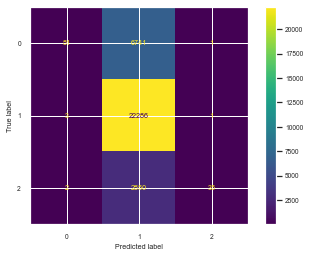

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2])
disp.plot()

In [83]:
np.sum(cm,axis=1)
# cm

array([ 281,  769, 1237,  113], dtype=int64)

In [40]:
# for _,col in enumerate(data2_std.columns):
for col in data2_std.columns:
    # print(_,col)
    # exec('F%s = data2_std[col][(data2_std[col] < 3) & (data2_std[col] > -3)]' % _)
    data2_std = data2_std[(data2_std[col] < 3) & (data2_std[col] > -3)]

In [76]:
data2_std

,ListingCreationDate,CreditGrade,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,MonthlyLoanPayment (%),LP_CustomerPayments (%),LP_CustomerPrincipalPayments (%),LP_InterestandFees (%),LP_ServiceFees (%),LP_CollectionFees (%),LP_GrossPrincipalLoss (%),LP_NetPrincipalLoss (%),LP_NonPrincipalRecoverypayments (%),Target
1,-1.112296,0.679445,0.434623,0.249208,0.348188,0.358898,-0.814005,0.121118,0.578862,-0.337563,...,0.380068,0.932844,0.682556,1.026261,-1.094957,0.223002,-0.677467,-0.658520,-0.185666,0.037454
3,-1.112296,0.111958,0.434623,-0.344141,-0.270201,-0.269329,-0.814005,-0.440744,0.211304,-0.337563,...,-0.008572,0.724143,0.682478,0.404307,-1.023000,0.223002,-0.677467,-0.658520,-0.185666,0.037454
7,-1.112296,0.111958,-0.453532,-0.342897,-0.268899,-0.268006,-0.814005,1.806702,-1.136408,-0.337563,...,0.026648,0.658010,0.682556,0.206957,-0.724465,0.223002,-0.677467,-0.658520,-0.185666,0.037454
9,0.893957,-0.455529,0.434623,-0.504449,-0.530575,-0.533845,1.105890,-0.721674,-0.033735,-0.337563,...,-0.119247,0.629971,0.682543,0.123405,-0.944701,0.223002,-0.677467,-0.658520,-0.185666,0.037454
10,0.893957,-1.023015,-0.453532,-0.778675,-0.723252,-0.729588,0.625916,0.753212,1.007679,-0.337563,...,-0.225088,0.257575,0.682556,-0.986776,0.865062,0.223002,-0.677467,-0.658520,-0.185666,0.037454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18499,-1.112296,0.111958,-0.453532,0.655262,0.771297,0.788738,-0.814005,1.806702,0.027525,-0.337563,...,0.629985,-0.886149,-1.159684,0.339482,-0.012258,0.125094,1.166266,1.215767,-0.058957,-1.176416
18500,0.893957,-1.023015,1.322777,-1.493032,-1.467923,-1.353847,0.625916,-0.721674,0.578862,-0.337563,...,-0.621812,0.345468,0.682575,-0.724806,1.814551,0.223002,-0.677467,-0.658520,-0.185666,0.037454
18502,0.893957,-1.590502,1.322777,-0.905777,-0.947174,-0.957072,1.105890,-1.143070,1.191458,-0.337563,...,-0.346472,-0.267472,-0.174586,-0.348553,-0.709804,0.223002,0.180378,0.213533,-0.185666,2.465194
18503,0.893957,0.111958,1.322777,-0.545987,-0.667272,-0.672717,1.585863,-0.721674,0.211304,-0.337563,...,-0.194459,0.596641,0.682545,0.024036,-0.983973,0.223002,-0.677467,-0.658520,-0.185666,0.037454


In [41]:
selected_cols = ['BorrowerAPR','LenderYield','EmploymentStatusDuration','FirstRecordedCreditLine', 'OpenCreditLines','TotalInquiries'
,'TotalCreditLinespast7years','TotalTrades','DebtToIncomeRatio','StatedMonthlyIncome','MonthlyLoanPayment','LP_CustomerPayments','LP_InterestandFees','LP_ServiceFees','Investors','LP_InterestandFees (%)']
# ,'BorrowerRate', 'CurrentCreditLines',

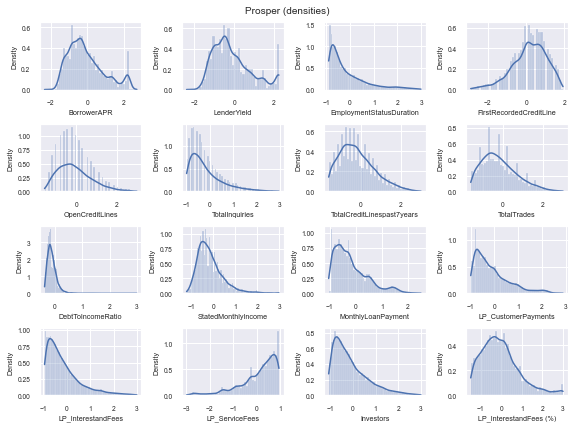

In [42]:
# selected_features = np.random.choice(50,16)
# selected_features = np.arange(0,16)
# selected_features = [1,2,3,4,5,6,10,15,17,28,31,32,34,36,37,38]
fig, ax = plt.subplots(4,4,figsize=(8,6))
# for f in range(16):
for _,col in enumerate(selected_cols):
    sns.histplot(data2_std[col],kde=True,stat="density",alpha=0.3, ax=ax[int(np.floor(_/4)),_%4]) #label=data2_std.columns[f]
    # ax[int(np.floor(f/4)),f%4].set_title(data2_std.columns[f])
plt.suptitle(folders[i]+' (densities)', fontsize=10)
plt.tight_layout()

* Data is not labeled as far as I can see. So this can make the feature selection process 
* Did not perform any dimensionality reduction
* 

name                                                lognorm
score                                              0.230697
loc                                               -2.576269
scale                                              2.308021
arg                                   (0.3832345020951179,)
params    (0.3832345020951179, -2.5762686009505282, 2.30...
Name: 0, dtype: object
name                                             genextreme
score                                              0.368089
loc                                               -0.559284
scale                                               0.72721
arg                                 (-0.04757578451092262,)
params    (-0.04757578451092262, -0.559284252113391, 0.7...
Name: 0, dtype: object
name                                          expon
score                                      0.199533
loc                                       -0.899131
scale                                      0.772836
arg                       

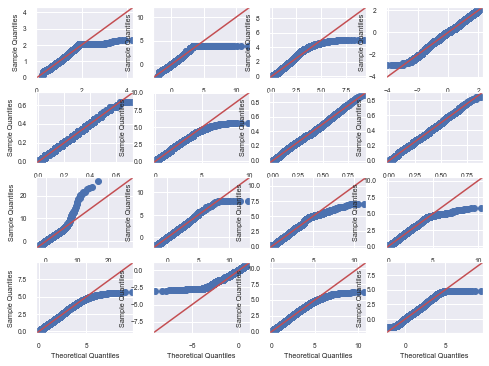

In [75]:
fig, ax = plt.subplots(4,4,figsize=(8,6))
from distfit import distfit
import statsmodels.api as sm
from scipy import stats
dist = dict()
selected_features = range(16)#[:]
for _,col in enumerate(selected_cols):
    dist[_] = distfit()
    dist[_].fit_transform(data2_std[col], verbose = 0)
    # print(dist.summary.loc[:2,['name','score']])
    print(dist[_].summary.iloc[0,:6])
    sm.qqplot(data2_std[col], eval('stats.%s' % dist[_].summary.loc[0,'name']), fit=True, line='45',ax=ax[int(np.floor(_/4)),_%4])
    # ax[int(np.floor(_/4)),_%4].set_title(data2_std.columns[f])
# dist.plot()

In [67]:
selected_cols[]

['BorrowerAPR',
 'LenderYield',
 'EmploymentStatusDuration',
 'FirstRecordedCreditLine',
 'OpenCreditLines',
 'TotalInquiries',
 'TotalCreditLinespast7years',
 'TotalTrades',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'MonthlyLoanPayment',
 'LP_CustomerPayments',
 'LP_InterestandFees',
 'LP_ServiceFees',
 'Investors',
 'LP_InterestandFees (%)']

name                                          expon
score                                      0.199533
loc                                       -0.899131
scale                                      0.772836
arg                                              ()
params    (-0.8991313612968951, 0.7728356612972103)
Name: 0, dtype: object


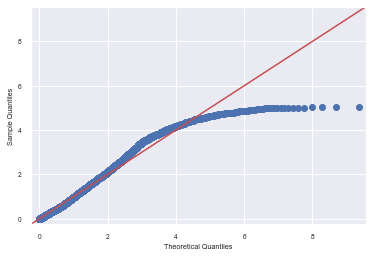

In [73]:
j=2
col = data2_std[selected_cols[j]]
print(dist[j].summary.iloc[0,:6])
import statsmodels.api as sm
from scipy import stats
sm.qqplot(col, eval('stats.%s' % dist[j].summary.loc[0,'name']), fit=True, line="45");

(<Figure size 1440x1080 with 1 Axes>,
 <Axes: title={'center': '\nexpon(loc=-0.899131, scale=0.772836)'}, xlabel='Values', ylabel='Frequency'>)

<Figure size 720x432 with 0 Axes>

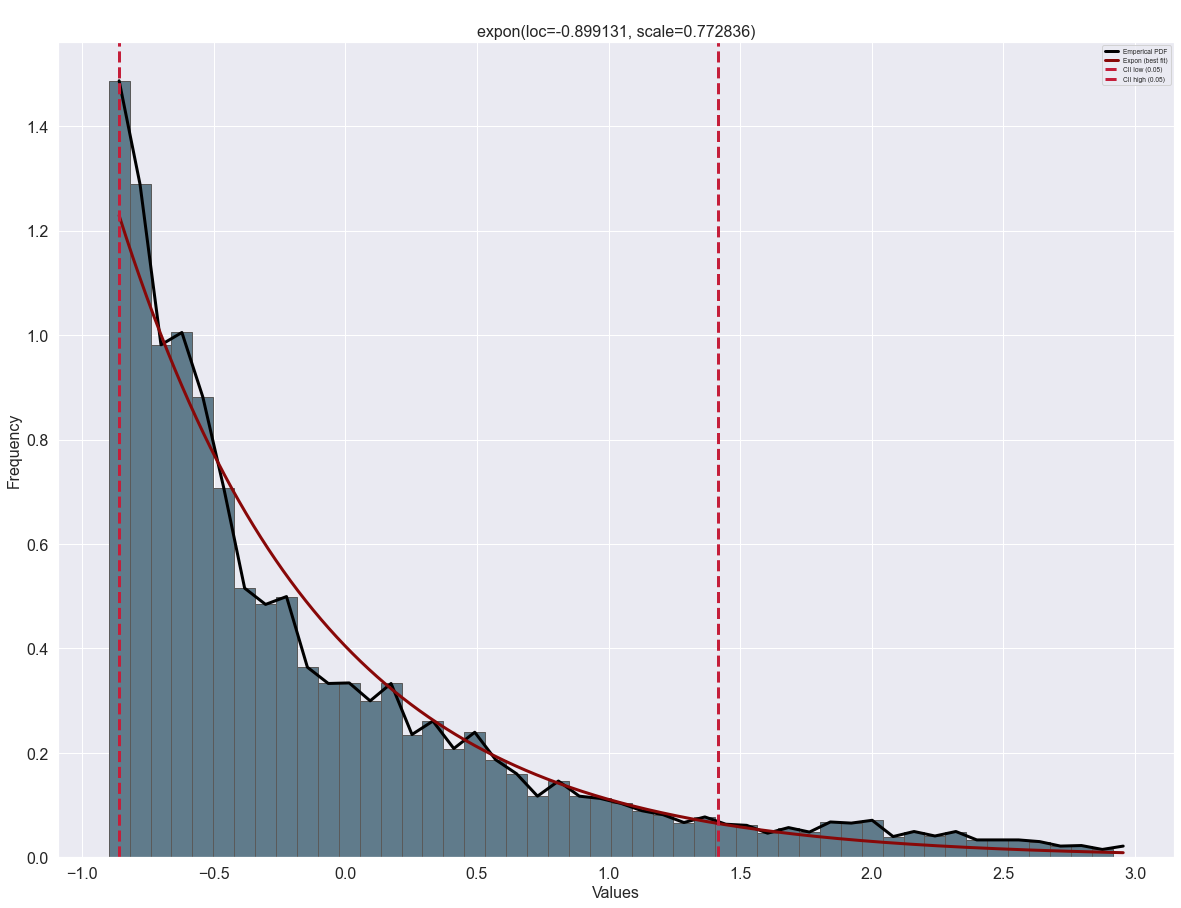

In [74]:
plt.figure(figsize=(10,6))
dist[2].plot()